### Data Preprocessing

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline
plt.style.use('ggplot')

### Data Preprocessing ###
dataset = pd.read_csv('HR-Employee-Attrition.csv')
dataset['Attrition_ind'] = 0 
dataset.loc[dataset['Attrition'] =='Yes', 'Attrition_ind'] = 1

dataset = pd.get_dummies(dataset)
dataset.columns

Index([u'Age', u'DailyRate', u'DistanceFromHome', u'Education',
       u'EmployeeCount', u'EmployeeNumber', u'EnvironmentSatisfaction',
       u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
       u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
       u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
       u'StandardHours', u'StockOptionLevel', u'TotalWorkingYears',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager', u'Attrition_ind', u'Attrition_No',
       u'Attrition_Yes', u'BusinessTravel_Non-Travel',
       u'BusinessTravel_Travel_Frequently', u'BusinessTravel_Travel_Rarely',
       u'Department_Human Resources', u'Department_Research & Development',
       u'Department_Sales', u'EducationField_Human Resources',
       u'EducationField_Life Sciences', u'EducationField_Marketing',
       u'EducationField_Medical', u'Educa

In [41]:
data_main = dataset.drop(['EmployeeCount','EmployeeNumber', 'Over18_Y','StandardHours','Attrition_No', 'Attrition_Yes', 'YearsInCurrentRole', u'YearsSinceLastPromotion', u'YearsWithCurrManager'], axis=1)
data_main.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [42]:
data_main.columns

Index([u'Age', u'DailyRate', u'DistanceFromHome', u'Education',
       u'EnvironmentSatisfaction', u'HourlyRate', u'JobInvolvement',
       u'JobLevel', u'JobSatisfaction', u'MonthlyIncome', u'MonthlyRate',
       u'NumCompaniesWorked', u'PercentSalaryHike', u'PerformanceRating',
       u'RelationshipSatisfaction', u'StockOptionLevel', u'TotalWorkingYears',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'Attrition_ind', u'BusinessTravel_Non-Travel',
       u'BusinessTravel_Travel_Frequently', u'BusinessTravel_Travel_Rarely',
       u'Department_Human Resources', u'Department_Research & Development',
       u'Department_Sales', u'EducationField_Human Resources',
       u'EducationField_Life Sciences', u'EducationField_Marketing',
       u'EducationField_Medical', u'EducationField_Other',
       u'EducationField_Technical Degree', u'Gender_Female', u'Gender_Male',
       u'JobRole_Healthcare Representative', u'JobRole_Human Resources',
       u'JobRole_La

In [43]:
x=data_main.drop('Attrition_ind',axis=1)
y=data_main.Attrition_ind

### Splitting into Train and Test Set

In [44]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

### Decision Tree

In [45]:
## DecisionTree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
model = DecisionTreeClassifier(criterion="entropy", random_state=1) 
result_train = model.fit(X_train, y_train)

# Predicting Train Set
y_pred_train = model.predict(X_train)
print("Accuracy on train set: %0.4f" % metrics.accuracy_score(y_train, y_pred_train))

# Predicting Test Set
y_pred_test = model.predict(X_test)
print("Accuracy on test set: %0.4f" % metrics.accuracy_score(y_test, y_pred_test))

Accuracy on train set: 1.0000
Accuracy on test set: 0.7925


#### This is far worse than the 100% accuracy we expected from the training set. Clearly, we are overfitting.

#### One way to avoid overfitting is to ensure that trees never become too deep, via the max_depth argument.

### Pruning to Avoid Overfitting
#### Generally it is preferred to have a simple model, it avoids overfitting issue.
#### Any addtional split that does not add signiicant value is not worthwhile.
#### We try to avoid overfitting by changing the parameters:
##### max_leaf_nodes
##### min_samples_leaf
##### max_depth
#### Reduce the number of leaf nodes, restrict the size of sample leaf, and reduce the depth of the tree to build a generalized tree

In [46]:
## DecisionTree
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
model2 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=5, max_depth=4, max_leaf_nodes=10, random_state=1) 
result_train = model2.fit(X_train, y_train)

# Predicting Train Set
y_pred_train = model2.predict(X_train)
print("Accuracy on train set: %0.4f" % metrics.accuracy_score(y_train, y_pred_train))

# Predicting Test Set
y_pred_test = model2.predict(X_test)
print("Accuracy on test set: %0.4f" % metrics.accuracy_score(y_test, y_pred_test))

Accuracy on train set: 0.8614
Accuracy on test set: 0.8537


#### What does the tree look like

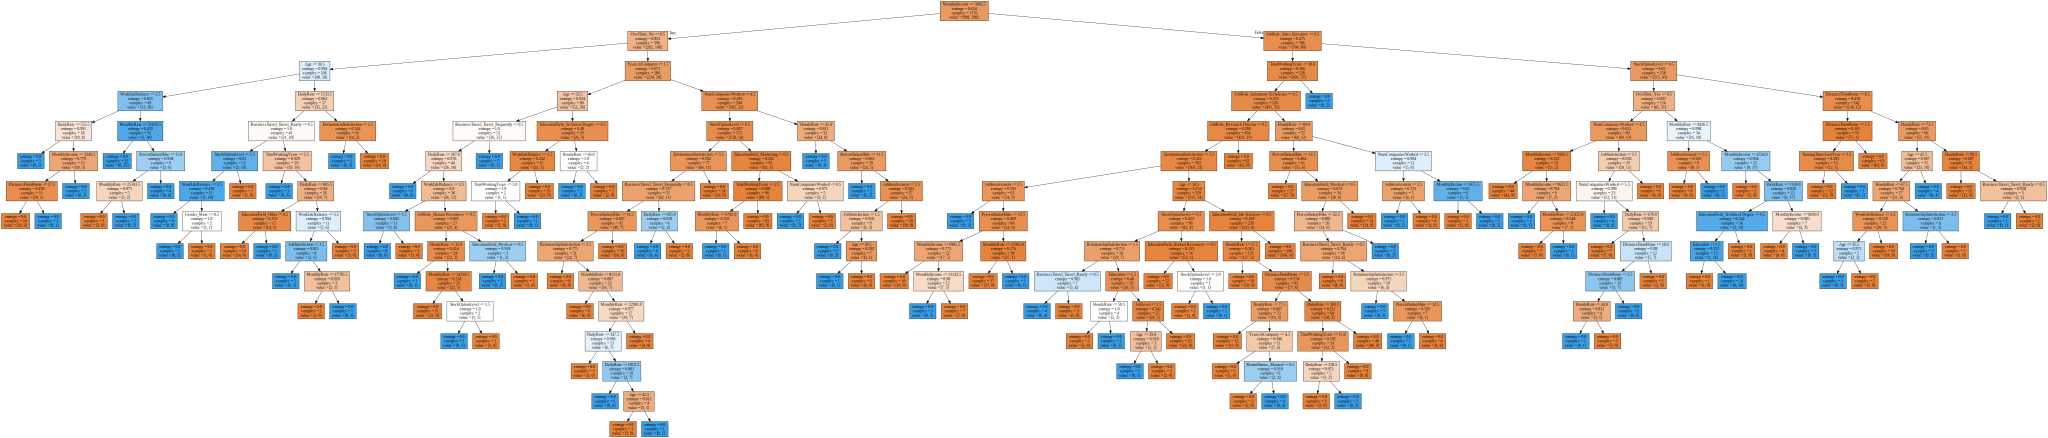

In [47]:
import graphviz
graphviz.Source(tree.export_graphviz(model, out_file=None, feature_names=x.columns.values, filled=True))

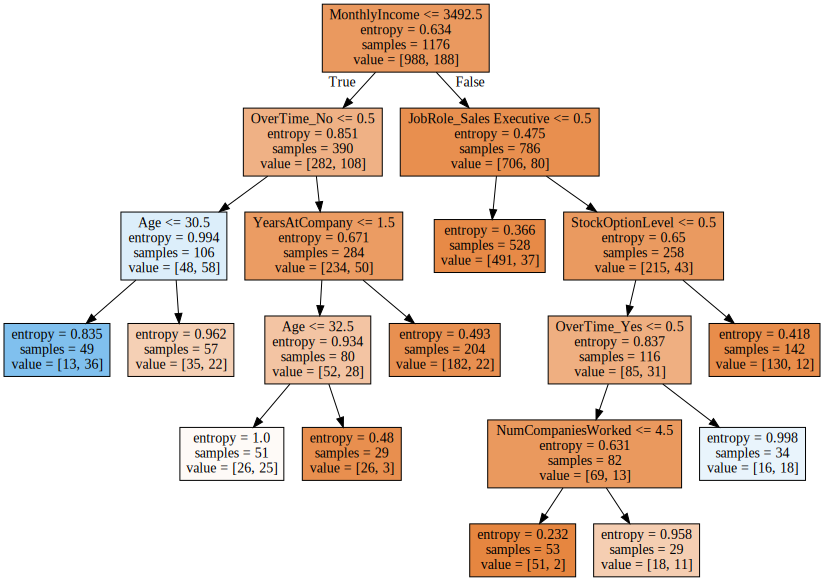

In [48]:
graphviz.Source(tree.export_graphviz(model2, out_file=None, feature_names=x.columns.values, filled=True))

### Randomforest

Accuracy on test set: 0.8605


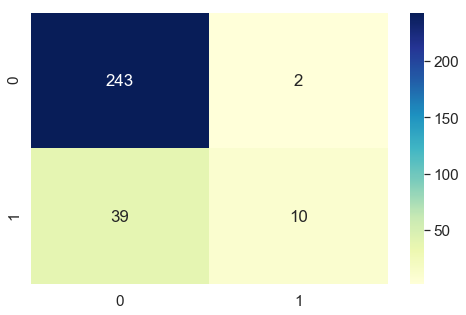

In [22]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 1, n_estimators = 100, criterion = 'entropy')
model.fit(X_train, y_train)

# Predicting Test Set
y_pred_test = model.predict(X_test)

## Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (8,5))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g', cmap="YlGnBu")
print("Accuracy on test set: %0.4f" % metrics.accuracy_score(y_test, y_pred_test))

In [16]:
features_label = x.columns
importances = model.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(x.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) Age                            0.076413
 2) DailyRate                      0.063912
 3) DistanceFromHome               0.059433
 4) Education                      0.057706
 5) EnvironmentSatisfaction        0.053864
 6) HourlyRate                     0.049724
 7) JobInvolvement                 0.047713
 8) JobLevel                       0.043273
 9) JobSatisfaction                0.035476
10) MonthlyIncome                  0.035102
11) MonthlyRate                    0.033794
12) NumCompaniesWorked             0.029391
13) PercentSalaryHike              0.028534
14) PerformanceRating              0.027296
15) RelationshipSatisfaction       0.027226
16) StockOptionLevel               0.026695
17) TotalWorkingYears              0.025380
18) TrainingTimesLastYear          0.024726
19) WorkLifeBalance                0.023811
20) YearsAtCompany                 0.021119
21) BusinessTravel_Non-Travel      0.020732
22) BusinessTravel_Travel_Frequently 0.016630
23) BusinessTravel_Travel_Rare

In [17]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


<BarContainer object of 48 artists>

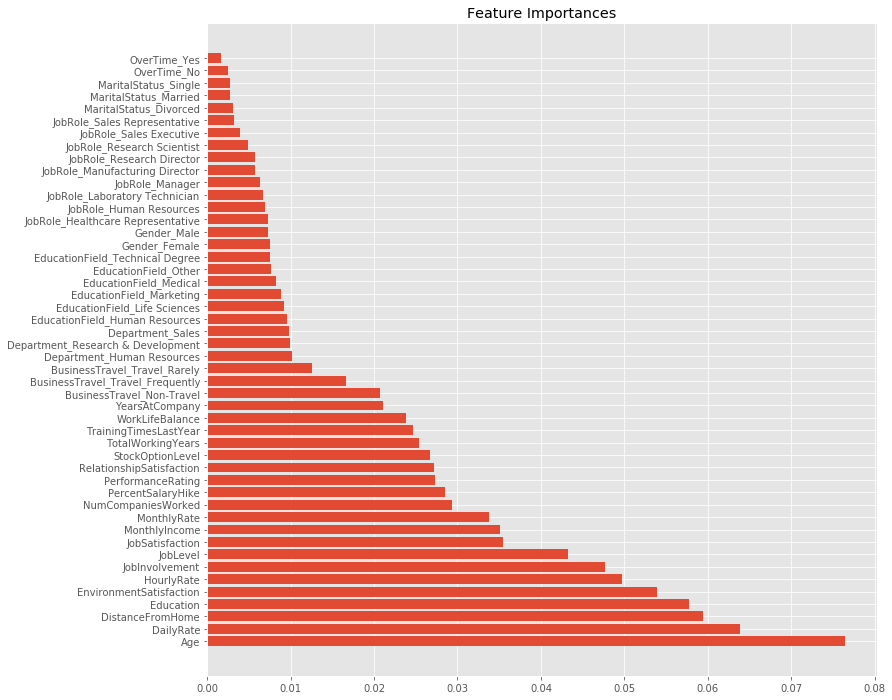

In [18]:
plt.title('Feature Importances')
plt.barh(features_label, importances[indices])

### Gradient Boosting

Accuracy on test set: 0.8605


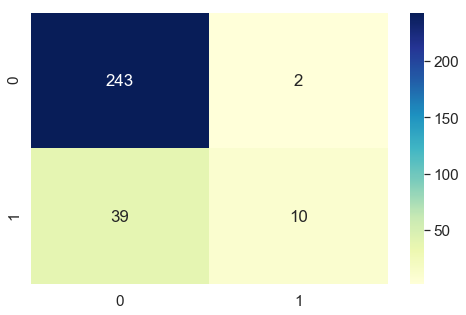

In [27]:
## GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state = 1, n_estimators = 100)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred_test = model.predict(X_test)

## Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (8,5))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g', cmap="YlGnBu")
print("Accuracy on test set: %0.4f" % metrics.accuracy_score(y_test, y_pred_test))

Populating the interactive namespace from numpy and matplotlib


E:\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0,0.5,'Test accuracy')

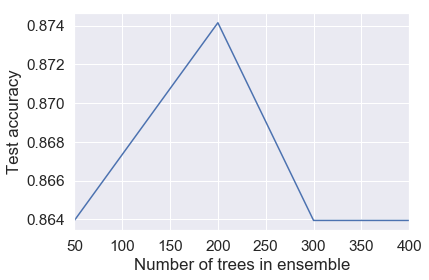

In [36]:
from pandas import Series, DataFrame
%pylab inline

scores = {}
for num_trees in [50, 100, 200, 300, 400]:
    model = GradientBoostingClassifier(n_estimators=num_trees, max_depth=2, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Number of trees in ensemble')
ylabel('Test accuracy')

Text(0,0.5,'Test accuracy')

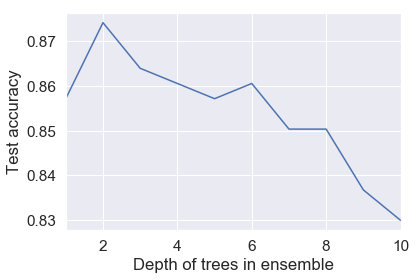

In [35]:
scores = {}
for depth in range(1, 11):
    model = GradientBoostingClassifier(n_estimators=200, max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[depth] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

Accuracy on test set: 0.8741


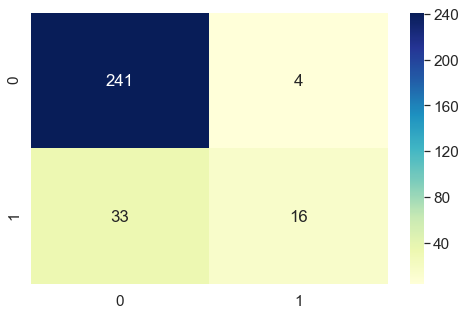

In [38]:
model = GradientBoostingClassifier(n_estimators=200, max_depth=2, random_state=1)
model.fit(X_train, y_train)

# Predicting Test Set
y_pred_test = model.predict(X_test)

## Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (8,5))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g', cmap="YlGnBu")
print("Accuracy on test set: %0.4f" % metrics.accuracy_score(y_test, y_pred_test))